# *Лабораторная Работа №4 : Рекуррентные нейронные сети*



 **Цель работы: познакомиться с работой рекуррентных нейронных сетей и их пременением.**

## Теоретические сведения

Рекуррентная нейронная сеть (RNN) является частным случаем рекурсивной сети, обладающей специфической структурой в форме линейной последовательности. В то время как рекурсивные нейронные сети (Recursive Neural Networks) способны обрабатывать данные с древовидной или иной иерархической структурой, рекуррентные сети ориентированы исключительно на анализ последовательных данных, упорядоченных во времени.

Основной принцип работы RNN заключается в установлении связей между последовательными временными шагами с помощью скрытого слоя нейронов, который передает информацию о предыдущих состояниях в будущее. Такой механизм позволяет модели учитывать контекст предшествующих элементов последовательности при обработке текущего входного сигнала, что особенно важно для задач временного прогнозирования, обработки естественного языка и анализа временных рядов.

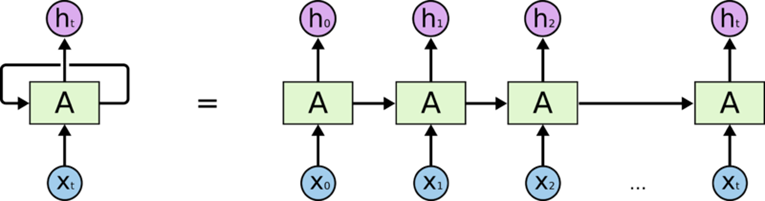

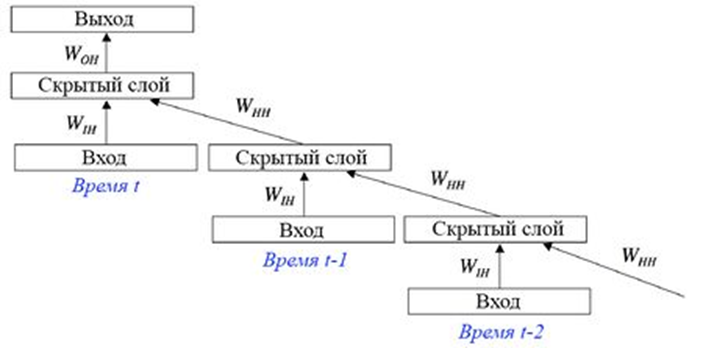

**Обучение RNN**

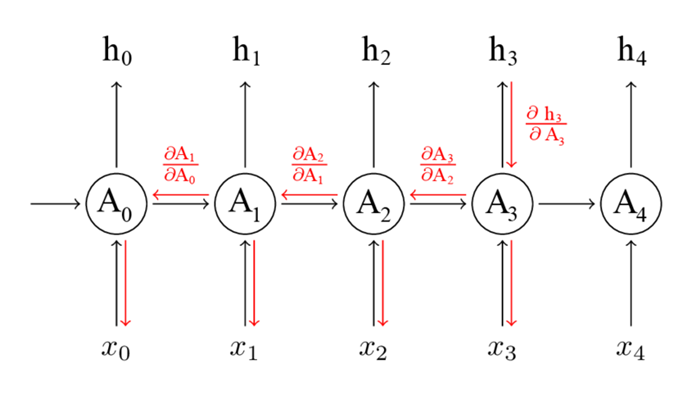

В рекуррентных нейронных сетях одни и те же параметры (веса и смещения) используются на всех временных шагах, что позволяет эффективно моделировать последовательности данных. При этом вычисление градиентов на каждом временном шаге зависит не только от локальных вычислений, но и от всех предыдущих шагов.

Обучение RNN осуществляется с помощью алгоритма обратного распространения ошибки сквозь время (Backpropagation Through Time, BPTT). Этот метод представляет собой расширение стандартного алгоритма обратного распространения ошибки, но с учетом временной структуры данных. Например, при вычислении градиента для четвертого элемента последовательности необходимо учесть влияние всех предыдущих шагов — ошибка распространяется назад во времени на несколько шагов, и градиенты суммируются.

Данный механизм позволяет корректировать параметры сети таким образом, чтобы оптимально учитывать зависимость между элементами последовательности, однако он также подвержен эффектам затухающих и взрывающихся градиентов, что может затруднять обучение при обработке длинных последовательностей.

### **Какие существуют типы рекуррентных нейронных сетей?**




RNN часто имеют архитектуру «один к одному», где одна входная последовательность строго сопоставляется с одним выходом. Но вы можете гибко настраивать их в разных конфигурациях с учетом конкретных целей. Ниже приведены несколько распространенных типов RNN.

**1.один к одному** (One-to-One)

 RNN один элемент входной последовательности соответствует одному элементу выходной последовательности. Это самая простая и прямолинейная конфигурация, где на каждый входной вектор (например, слово, символ или временной шаг) модель генерирует один выходной вектор. Этот тип архитектуры подходит для задач, где требуется простая классификация или регрессия на основе одного входа.

Пример:

В задаче классификации текста (например, распознавание языка текста), модель может взять один текстовый фрагмент, обработать его и выдать метку, соответствующую языку (например, "английский", "русский", "французский").

Таким образом, основное отличие архитектуры "один к одному" от других типов RNN заключается в том, что для каждого входного элемента генерируется один выходной элемент.

**2.Один ко многим**(one to many)

Такой тип RNN направляет один вход на несколько выходов. Он позволяет создать лингвистические приложения, например для создания субтитров к изображениям, которые генерируют предложение по одному ключевому слову.

**3.Многие ко многим**(many to many)

Такая модель использует несколько входов для прогнозирования нескольких выходов. Например, вы можете создать с помощью RNN программу перевода, которая анализирует предложение на одном языке и правильно выстраивает слова на другом.

**4.Многие к одному**(many to one)

Здесь несколько входов сопоставляются с одним выходом. Это полезно для таких приложениях, как анализ настроений, в которых модель прогнозирует категорию «положительный, отрицательный или нейтральный» для настроения клиента, исходя из текста его отзыва.

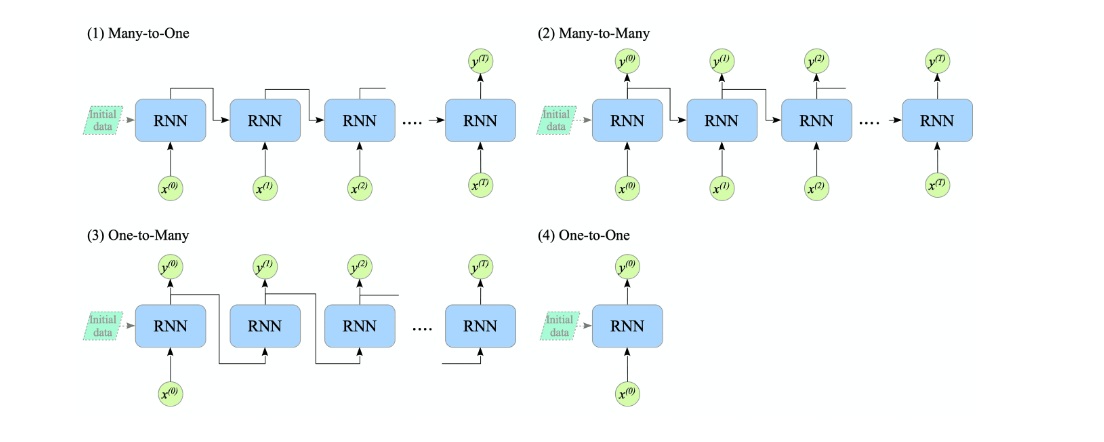

### **Какие существуют варианты архитектуры для рекуррентной нейронной сети?**

Рекуррентные нейронные сети (RNN) обладают ограничениями, связанными с затуханием и взрывающимися градиентами, а также трудностями при обработке долгосрочных зависимостей. Чтобы устранить эти проблемы, были предложены несколько усовершенствованных архитектур:

1.**Долгая краткосрочная память (LSTM, Long Short-Term Memory)**

LSTM-ячейки решают проблему затухающих градиентов благодаря механизму внутреннего состояния (cell state) и системе управляемых затворов:

1.Входной затвор (input gate) контролирует, какая новая информация будет добавлена в состояние.

2.Затвор забывания (forget gate) регулирует, какая часть информации будет сохранена или забыта.

3.Выходной затвор (output gate) определяет, какие значения передаются в следующее скрытое состояние.

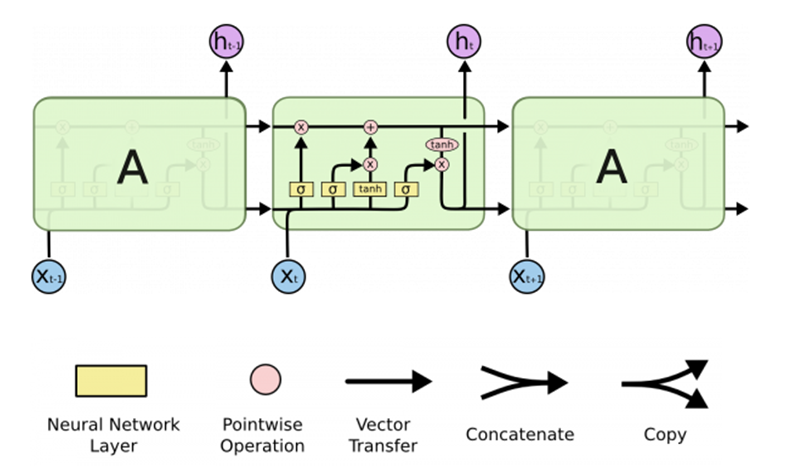

Эта архитектура позволяет эффективно учитывать долгосрочные зависимости в данных.

В LSTM гейты регулируют количество информации в состоянии ячейки, пропуская или блокируя данные. Каждый гейт использует сигмовидный слой, который генерирует значения от 0 до 1. Эти значения определяют, сколько информации пропустить дальше: 0 — ничего не пропустить, 1 — пропустить все.

**Слой утраты в LSTM**



 в LSTM отвечает за решение, какую информацию следует удалить из состояния ячейки. Этот процесс контролируется сигмовидным слоем, называемым слоем гейта утраты. Он принимает на вход текущие данные (h и x) и генерирует значения от 0 до 1 для каждого элемента состояния ячейки C, определяя, сколько информации следует забыть.

Например, при прогнозировании следующего слова в предложении состояние ячейки может содержать информацию о роде существительного, чтобы правильно выбрать местоимение. Когда появляется новое подлежащее, необходимо забыть род предыдущего подлежащего, чтобы сеть могла адаптироваться к новым данным.

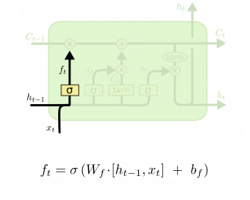

На следующем шаге LSTM решает, какую новую информацию нужно сохранить в состоянии ячейки. Этот процесс делится на два этапа:

1. **Гейт входа (input gate)** с использованием **сигмовидного слоя** решает, какие части информации из входных данных следует обновить. Он генерирует значения от 0 до 1, определяя, какие данные важны для обновления состояния.
  
2. **Слой кандидатов (candidate layer)** использует функцию активации **tanh** для создания вектора новых значений-кандидатов, которые могут быть добавлены в состояние ячейки.

После этого эти два этапа комбинируются, чтобы обновить состояние ячейки. Например, в лингвистической модели это может означать добавление **рода нового подлежащего** в состояние, чтобы заменить род предыдущего подлежащего.

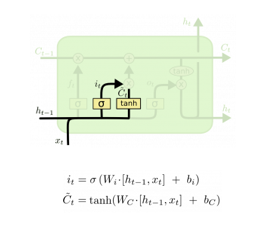

**Новое состояние** в LSTM обновляется следующим образом:

1. **Старое состояние умножается на гейт забывания (f)**, что позволяет **удалить** информацию, которую решено забыть.
2. **Добавляем результат умножения гейта входа (i) на новые значения кандидатов (C)**. Эти значения представляют собой обновленную информацию, которую мы решили сохранить.

Итоговое состояние ячейки получается путем комбинирования старого состояния и новых данных, масштабированных в зависимости от решения о том, что нужно сохранить.

В лингвистической модели это может означать **удаление информации о роде старого подлежащего** и **добавление информации о роде нового подлежащего** для правильного использования местоимений.

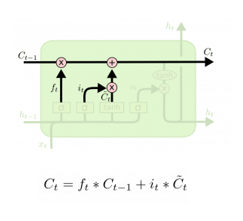

**Выход**

в LSTM определяется следующим образом:

1. Сначала **сигмовидный слой** решает, какие части состояния ячейки следует вывести. Он генерирует значения от 0 до 1, которые указывают, какие элементы состояния должны быть активированы для вывода.
   
2. Затем состояние ячейки пропускается через **tanh**, чтобы привести все значения в диапазон от -1 до 1.

3. Итоговое состояние умножается на выходной сигнал сигмовидного гейта, который контролирует, какая информация будет передана на выход.

В лингвистической модели это может означать, что, работая с подлежащим, сеть генерирует информацию, которая относится к глаголу. Например, она может вывести информацию о числе подлежащего (единственное или множественное), что важно для правильного спряжения глагола.

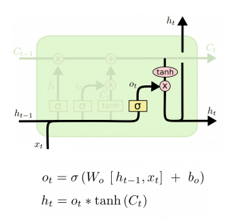

**2.Управляемый рекуррентный блок Gated Recurrent Units (GRU)**

механизм вентилей для рекуррентных нейронных сетей, предложенный в 2014 году. Он схож с LSTM, но имеет меньше параметров, так как не использует выходной вентиль.

GRU объединяет фильтры **"забывания"** и **"входа"** в один **фильтр обновления (update gate)**, который решает, сколько информации сохранить и сколько принять от предыдущего слоя. Также используется **фильтр сброса (reset gate)**, похожий на фильтр забывания, но с другой структурой. Эти изменения делают GRU более эффективным и с меньшим количеством параметров.


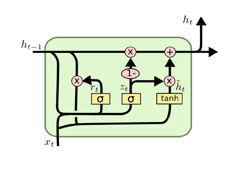

### **Какие ограничения у рекуррентных нейронных сетей (RNN)?**

С момента появления рекуррентных нейронных сетей (RNN) инженеры машинного обучения достигли значительного прогресса в области обработки естественного языка (NLP), используя различные версии RNN. Однако у этого семейства моделей есть несколько ограничений.

**Взрывающийся градиент**

Взрывающийся градиент — это ситуация, когда величина градиента в процессе обучения модели резко увеличивается, что приводит к нестабильности модели. Для обновления весов в RNN используется правило обратного распространения ошибки через время (BPTT):


$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial E}{\partial \mathbf{W}}
$$

где 𝐸— ошибка, 𝑊 — веса, 𝜂 — коэффициент обучения. Когда значение градиента
$$
\frac{\partial E}{\partial W}
$$
Пример:
Пусть градиенты на каждом временном шаге $t$ обозначаются как $$\frac{\partial E}{\partial h_t}$$, где $h_t$ — скрытое состояние сети на шаге $t$. Если на одном из шагов:

​Пусть градиенты на каждом временном шаге $t$ обозначаются как
$$\frac{\partial E}{\partial h_t} = 10^5$$,
где $h_t$ — скрытое состояние сети на шаге $t$. Если на следующем шаге $t+k$ градиент равен $10^3$, то общий градиент на шаге $t+k$ будет:

$$\frac{\partial E}{\partial h_{t+k}} = 10^5 \cdot 10^3 = 10^8$$

Это приводит к экспоненциальному увеличению градиента. В зависимости от числа таких шагов, градиенты могут быстро увеличиваться, что вызовет **взрывной градиент**. В результате этого параметры модели будут обновляться слишком быстро, что приведет к нестабильности и снижению точности работы модели.

Для предотвращения подобных проблем применяются такие методы как **обрезка градиента** (gradient clipping), когда градиенты ограничиваются определенным порогом.



**Исчезающий градиент**

Исчезающий градиент возникает, когда градиенты становятся слишком малыми для эффективного обновления весов. В этом случае обучение модели становится медленным или вообще невозможным. В процессе обратного распространения ошибки через время, на каждом шаге модель использует скрытые состояния, обновляемые через:
Пусть скрытое состояние на шаге $t$ выражается как:
$$ h_t = f(W \cdot h_{t-1} + b) $$

Если веса $W$ слишком малы, то градиенты через несколько шагов начинают сходиться к нулю. Например, если $|W|$ значительно меньше 1, то градиент через несколько шагов будет стремиться к нулю:

$$ \frac{\partial E}{\partial h_t} = \prod_{i=t-k}^{t-1} W_i \cdot \frac{\partial E}{\partial h_{t+k}} $$

Если каждый $W_i$ меньше 1, то итоговый градиент будет уменьшаться экспоненциально:

$$ \frac{\partial E}{\partial h_{t+k}} \approx \epsilon \cdot 0.1^k $$

где $\epsilon$ — начальная величина градиента. Это приведет к невозможности корректного обучения модели, особенно на длинных последовательностях, так как вклад в обучение от более ранних шагов теряется.



**Медленное обучение**

RNN обрабатывает данные по одному элементу за раз, что затрудняет эффективную обработку больших объемов текста. Например, модель RNN может легко анализировать мнение покупателя по нескольким предложениям, но для создания резюме по целой странице текста ей потребуется значительные вычислительные ресурсы, память и время.

# Практика

 # Классификация текста с помощью RNN


Этот ноутбук является частью серии, в которой автор повторяет концепции глубокого обучения, которые давно не использовал. В настоящее время он изучает обработку естественного языка (NLP) и начинает с базовой реализации моделей в TensorFlow, чтобы затем перейти к более сложным моделям и наборам данных.

Основные этапы работы с Keras и TensorFlow
Настройка библиотек

1.   Подключаются необходимые библиотеки

2.   Загрузка/доступ к исходным данным

3.   Создание кодировщика текста - Этот шаг позволяет преобразовать предложения в векторные представления с помощью токенизации.

      Включает предварительную обработку текста, такую как удаление стоп-слов, приведение к нижнему регистру и очистку текста.
4.  Оптимизация текстового датасета
5.   Создание модели
6.  Компиляция модели
7.  Обучение модели
8.  Анализ результатов



**Описание задачи**

В этом конкретном ноутбуке автор решает задачу бинарной классификации отзывов IMDb.
Цель — предсказать, является ли отзыв положительным или отрицательным.

Эта задача классическая для NLP и часто используется для тестирования моделей, работающих с текстами.




In [ ]:
#Загрузка Датасетов
! pip install -q tensorflow_datasets

In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

import matplotlib.pyplot as plt

Функция plot_graphs строит график метрики обучения и валидации по эпохам, помогая анализировать процесс обучения модели.

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

### Загрузка Данных

загружаем датасет IMDb из библиотеки tensorflow_datasets, разделяем его на обучающую и тестовую выборки и выводит структуру элементов.
tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Загружает датасет IMDb с отзывами о фильмах.

**with_info=True** — загружает дополнительную информацию о датасете.

**as_supervised=True** — возвращает данные в виде пар (текст, метка), где:

**текст** — отзыв (строка).

**метка** — 0 (негативный отзыв) или 1 (позитивный отзыв).

**train_dataset, test_dataset = dataset['train'], dataset['test']**:

Разделяет данные на обучающий (train_dataset) и тестовый (test_dataset) наборы.

**train_dataset.element_spec** :

Выводит структуру одного элемента набора данных, показывая типы и формы данных.



In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Пример данных  

In [ ]:
for example, label in train_dataset.take(1):
    print(f'Text: {example.numpy()} \n')
    print(f'Label: {label.numpy()} \n')
    print("---")

Text: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 

Label: 0 

---


одготавливаемданные для эффективного обучения модели,

In [ ]:
'''
Определение параметров:

BUFFER_SIZE = 10000 — размер буфера для перемешивания данных (чем больше, тем лучше перемешивание).

BATCH_SIZE = 64 — количество примеров в одной партии (batch).
Обработка обучающего набора (train_dataset):

.shuffle(BUFFER_SIZE) — перемешивает данные в пределах буфера.

.batch(BATCH_SIZE) — группирует данные в пакеты по 64 примера.

.prefetch(tf.data.experimental.AUTOTUNE) — загружает следующие пакеты данных во время вычислений, оптимизируя обучение.

Обработка тестового набора (test_dataset):

Аналогично train_dataset, но без перемешивания перед обучением.
'''
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
    print(f"Texts : {example.numpy()[:3]} \n")
    print(f"Labels: {label.numpy()[:3]} \n")
    print("----")

Texts : [b'This movie pleasantly surprised me. It has a touching, slightly off-center approach that never loses your attention. This is a movie I never heard about, but if you want a "sleeper", this is it. Great writing, production, and acting. I highly recommend it for audiences who want something thoughtful. Nick Nolte, Sheryl Lee and Alan Arkin are marvelous. Why wasn\'t more made of this movie?'
 b"This film is one of the best of all time, certainly in the horror genre. The claustrophobic atmosphere is outstanding, the music is just as good as the film and the killer is as creepy as can be! Actors are fantastic, RIP Donald Pleasance you were fantastic as Dr Loomis, he made the film even better. Without him the film would be missing a vital ingredient. Jamie Lee Curtis is also superb as our beloved scream queen! Her innocence makes her unaware of the real evil that is after her until she finds her friends grossly murdered in the house, which of course is one of the films best scenes

## Text Encoder

инициализируем слой TextVectorization для преобразования текстовых данных в векторное представление, которое можно использовать для обучения модели.



**Токенизация (Tokenization)**

это процесс разбиения текста на отдельные элементы, называемые токенами. Токены могут быть словами, частями слов или даже символами. Токенизация помогает преобразовать текст в формат, пригодный для обработки машиной, например, в последовательности слов или символов.

**Embedding (Встраивание)**

это метод преобразования токенов (например, слов) в плотные векторные представления, где каждый токен представлен в виде многомерного вектора. Векторное представление сохраняет смысловые связи между словами, так что схожие по смыслу слова будут иметь похожие векторы. Это позволяет нейросетям работать с текстовыми данными более эффективно.

In [ ]:

VOCAB_SIZE = 1000

from tensorflow.keras.layers import TextVectorization

# Initialize the TextVectorization layer
encoder = TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())
print(vocab)


['' '[UNK]' 'the' 'and' 'a' 'of' 'to' 'is' 'in' 'it' 'i' 'this' 'that'
 'br' 'was' 'as' 'for' 'with' 'movie' 'but' 'film' 'on' 'not' 'you' 'are'
 'his' 'have' 'he' 'be' 'one' 'its' 'at' 'all' 'by' 'an' 'they' 'from'
 'who' 'so' 'like' 'her' 'just' 'or' 'about' 'has' 'if' 'out' 'some'
 'there' 'what' 'good' 'when' 'more' 'very' 'even' 'she' 'my' 'no' 'up'
 'would' 'which' 'only' 'time' 'really' 'story' 'their' 'were' 'had' 'see'
 'can' 'me' 'than' 'we' 'much' 'well' 'been' 'get' 'will' 'into' 'also'
 'because' 'other' 'do' 'people' 'bad' 'great' 'first' 'how' 'most' 'him'
 'dont' 'made' 'then' 'movies' 'make' 'films' 'could' 'way' 'them' 'any'
 'too' 'after' 'characters' 'think' 'watch' 'two' 'many' 'being' 'seen'
 'character' 'never' 'little' 'acting' 'where' 'plot' 'best' 'love' 'did'
 'know' 'life' 'show' 'does' 'ever' 'your' 'still' 'better' 'over' 'off'
 'these' 'end' 'say' 'while' 'here' 'man' 'why' 'scene' 'such' 'scenes'
 'go' 'should' 'something' 'through' 'im' 'back' 'those' '

In [ ]:
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

Обратите внимание, что предложения имеют переменную длину. TextVectorizers создает 0 padding до максимальной длины, доступной в наборе данных.

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[11, 18,  1, ...,  0,  0,  0],
       [11, 20,  7, ...,  0,  0,  0],
       [ 1,  2,  1, ...,  0,  0,  0]])

Важно отметить, что векторизация не является биективной, поскольку заглавные буквы и знаки препинания удаляются. Кроме того, размер словаря невелик, и поэтому некоторые работы будут токенизированы как Unknown TextVectorizer.

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'This movie pleasantly surprised me. It has a touching, slightly off-center approach that never loses your attention. This is a movie I never heard about, but if you want a "sleeper", this is it. Great writing, production, and acting. I highly recommend it for audiences who want something thoughtful. Nick Nolte, Sheryl Lee and Alan Arkin are marvelous. Why wasn\'t more made of this movie?'
Round-trip:  this movie [UNK] surprised me it has a [UNK] [UNK] [UNK] [UNK] that never [UNK] your attention this is a movie i never heard about but if you want a [UNK] this is it great writing production and acting i highly recommend it for [UNK] who want something [UNK] [UNK] [UNK] [UNK] lee and [UNK] [UNK] are [UNK] why wasnt more made of this movie                                                                                                                                                                                                                                                  

## Создать модель

Мы используем очень простую модель. Модель состоит из пяти слоев в последовательном потоке.


![](https://www.tensorflow.org/tutorials/text/images/bidirectional.png)



Слои `TextVectorization` и `Embedding` были объяснены. В слое `Bidirectional` используется рекуррентная нейросеть (RNN). Это позволяет передавать входные данные как в прямом, так и в обратном направлении, генерируя два выхода, которые затем конкатенируются и передаются в следующий слой `Dense`, а затем в финальный классификатор.

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

## Скомпилируйте модель

Мы компилируем модель. Мы используем Binary Crossentropy Loss, поскольку мы имеем дело с Binary Classification. Мы также используем Adam optmizer. Мы используем меньшую скорость обучения.

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Обучение молель

In [ ]:
history = model.fit(train_dataset, epochs=2,
                    validation_data=test_dataset,
                    validation_steps=30)

In [ ]:
plot_graphs(history, "accuracy")

Мы достигаем обоснованно высокой точности проверки, учитывая размер словаря и количество эпох.

## Запуск простого прогноза

Мы запускаем модель на простом предложении. Выход — логарифмическая вероятность, поэтому мы устанавливаем порог в 0,0 для положительного или отрицательного отзыва

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
predictions

Прогноз заключается в том, что обзор будет положительным, что кажется правдой. Тем не менее, вероятность очень близка к пороговому значению. Это может означать, что модель можно улучшить.

## Stacking two or more LSTM


**Стэкинг двух или более LSTM (Long Short-Term Memory) слоев:**

Рекуррентные слои (RNN, включая LSTM) могут возвращать последовательности. Это означает, что на выходе будут не только последние значения, но и значения для каждого шага во временной последовательности, что позволяет учитывать всю информацию о последовательности.

Когда `return_sequences=True`, выходной тензор имеет форму 3D: **(batch_size, time_steps, output_features)**, где:
- `batch_size` — размер пакета (batch),
- `time_steps` — количество временных шагов (например, количество слов в предложении),
- `output_features` — количество признаков на каждый временной шаг (например, размерность скрытого состояния LSTM).

Такой выход можно передать в последующие рекуррентные слои (например, другой LSTM или GRU), поскольку он сохраняет структуру временных шагов (3D-тензор), необходимую для работы с последовательностями.

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

Остальная часть конфигурации обучения та же самая.

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Теперь мы обучаем модель с той же конфигурацией, что и раньше.

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Теперь мы представим результаты обучения и проверки на графике.

In [ ]:
plot_graphs(history, "accuracy")

### Оценка

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Наконец, мы делаем прогноз по простому предложению:

In [ ]:
sample_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
predictions

# Задание:

Выберите другой текстовый датасет из tensorflow_datasets, например:

yelp_polarity_reviews (отзывы Yelp, бинарная классификация).

или любой другой  подходящий датасет


Примените такой же подход, :

1) Загрузите новый датасет с помощью tfds.load().

2) Выполните предобработку данных (разделение на обучение/тест, токенизация).

3) Обучите рекуррентную нейронную сеть (RNN).

4) Оцените модель и постройте графики точности/ошибки.


Контрольные вопросы :

1) Объясните разницу между рекуррентными нейронными сетями (RNN) и полносвязными нейронными сетями (FNN).

2) Почему RNN подходят для обработки последовательных данных?

3) Как проблема затухающих градиентов влияет на обучение RNN? Какие решения существуют?

# Порядок выполнения работы
1) Прочитать теоретическую часть.

2) Познакомиться с примером.

3) Выполнить задания .

5) В отчет занести код, результаты его работы и графики. Прописать ход работы/исследования.
